In [1]:
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from astropy.io import fits
import glob
from astropy.time import Time

In [5]:
files = glob.glob('20240219_hp4/*.fits.gz')
files.sort()

filename = files[-1]
with fits.open(filename) as hdul:  # open a FITS file
    data = hdul[1].data  # assume the first extension is an image
    header = hdul[1].header

In [6]:
data

FITS_rec([(0, nan, nan), (0, nan, nan), (0, nan, nan), ..., (0, nan, nan),
          (0, nan, nan), (0, nan, nan)],
         shape=(3072,), dtype=(numpy.record, [('nobs', '>i4'), ('clouds', '>f4'), ('sigma', '>f4')]))

In [7]:
header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   12 / length of dimension 1                          
NAXIS2  =                 3072 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  = 'nobs    '                                                            
TFORM1  = 'J       '                                                            
TNULL1  =               999999                                                  
TTYPE2  = 'clouds  '                                                            
TFORM2  = 'E       '        

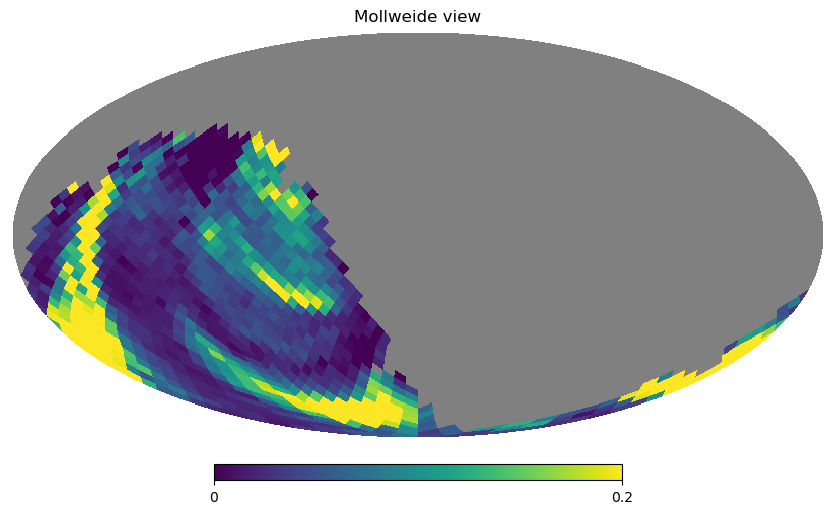

In [23]:
hp.mollview(data["clouds"], nest=True, min=0, max=0.2)

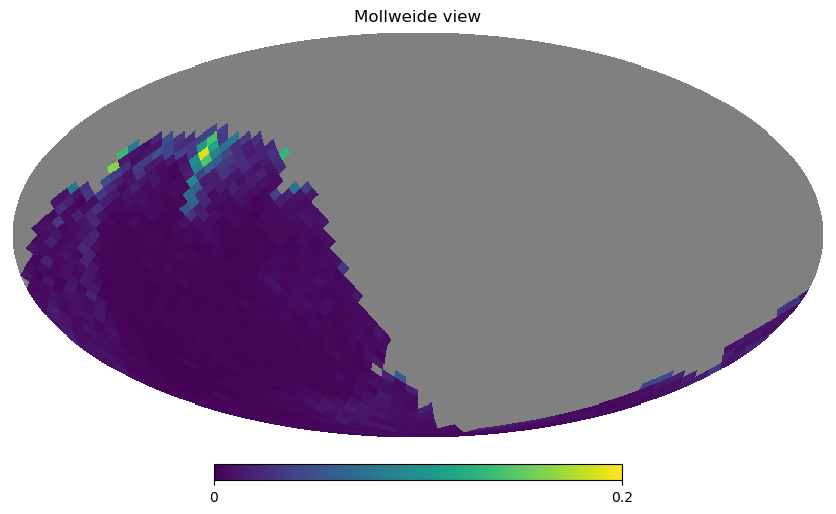

In [31]:
hp.mollview(data["sigma"], nest=True, min=0, max=0.2)

In [8]:
jd1 = 2460360.569450651
jd2 = 2460360.769421706

In [9]:
header["JD"]

2460360.769421706

In [11]:
ack = Time(jd1, format="jd")
ack.mjd

np.float64(60360.06945065083)

In [12]:
from rubin_scheduler.utils import SURVEY_START_MJD
SURVEY_START_MJD

60980.0